# Лабораторная работа №1: Метод золотого сечения и метод равномерного поиска

## Исследуемая функция:
$$f(x) = \frac{\sqrt{x^2 + 9}}{4} + \frac{5 - x}{5}$$

**Первая производная:**
$$f'(x) = \frac{x}{4\sqrt{x^2 + 9}} - \frac{1}{5}$$

### Критические точки

$$\frac{x}{4\sqrt{x^2 + 9}} - \frac{1}{5} = 0$$
$$5x = 4\sqrt{x^2 + 9}$$
$$25x^2 = 16x^2 + 144$$
$$9x^2 = 144$$
$$x^2 = 16$$
$$x = \pm 4$$

### Критические точки $ \in [-3, 8]$

Из двух критических точек $x = -4$ и $x = 4$:

- $x = -4 \notin [-3, 8]$ 
- $x = 4 \in [-3, 8]$ 

### Поведение производной

$$f'(x) = \frac{x}{4\sqrt{x^2 + 9}} - \frac{1}{5}$$

Знаки:

**При $x < 4$:**
- Возьмем $x = 0$: $f'(0) = 0 - \frac{1}{5} = -\frac{1}{5} < 0$
- Возьмем $x = 3$: $f'(3) = -0.023 < 0$

**При $x > 4$:**
- Возьмем $x = 5$: $f'(5) = 0.014 > 0$

## Функция унимодальна

<div align="center">
  <img src="img/image.png" alt="wrong path" width="500">
</div>

## Метод золотого сечения

$$
\min_{x\in[a,b]} f(x),\qquad f:[a,b]\to\mathbb{R}
$$

$$
\varphi=\frac{1+\sqrt5}{2},\qquad \rho=\varphi-1=\frac{1}{\varphi}
$$

$$
a_0=a,\quad b_0=b,\qquad
c_k=b_k-\rho\,(b_k-a_k),\qquad d_k=a_k+\rho\,(b_k-a_k)
$$

$$
\begin{cases}
\text{если } f(c_k)\le f(d_k): & a_{k+1}=a_k,\quad b_{k+1}=d_k,\\[4pt]
\text{иначе}: & a_{k+1}=c_k,\quad b_{k+1}=b_k~,
\end{cases}
\qquad k=0,1,2,\dots
$$

$$
\text{критерий останова:}\quad
(b_k-a_k)\le \varepsilon_x\ \ \text{или}\ \ |f(c_k)-f(d_k)|\le \varepsilon_f\ \ \text{или}\ \ k=N
$$

$$
x^\star=\frac{a_N+b_N}{2},\qquad f(x^\star)\approx \min f,\qquad
|b_N-a_N|=\rho^{\,N}\,|b_0-a_0|
$$

$$
\text{обозн.: } f(x)\ \text{— целевая функция},\ x\ \text{— аргумент},\
$$

$$
[a_k,b_k]\ \text{— интервал на итерации }k,\ c_k,d_k\ \text{— внутренние точки},
$$

$$
\
\varepsilon_x>0\ \text{— допуск по аргументу},
$$

$$
\ \varepsilon_f>0\ \text{— допуск по функции},
$$

$$
\
N\in\mathbb{N}\ \text{— лимит итераций},\ X=[a,b].
$$

$$  
    N \geq \frac{ln \frac{((b-a))}{2\epsilon}}{ln(\frac{1}{\rho})}
$$



Golden-section:
0: f(2.500000) = 1.476281 (-3.000000 - +8.000000)


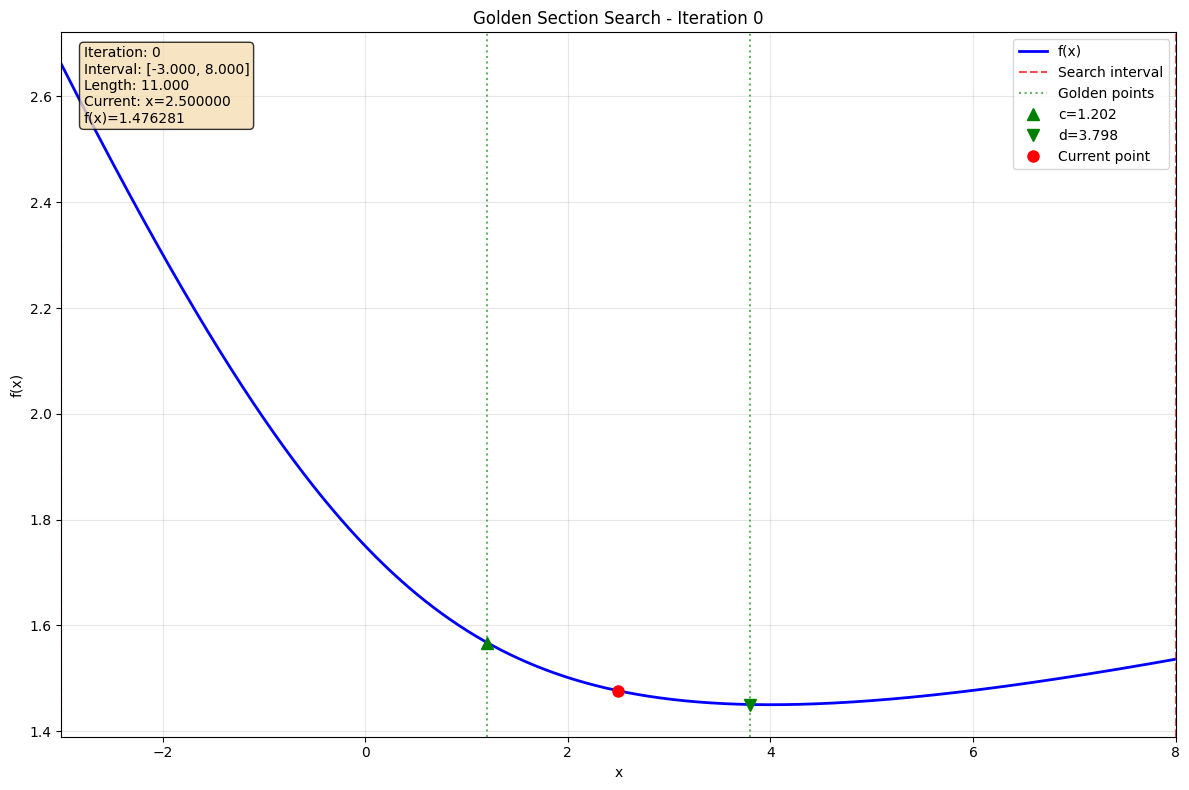

1: f(4.600813) = 1.452961 (+1.201626 - +8.000000)


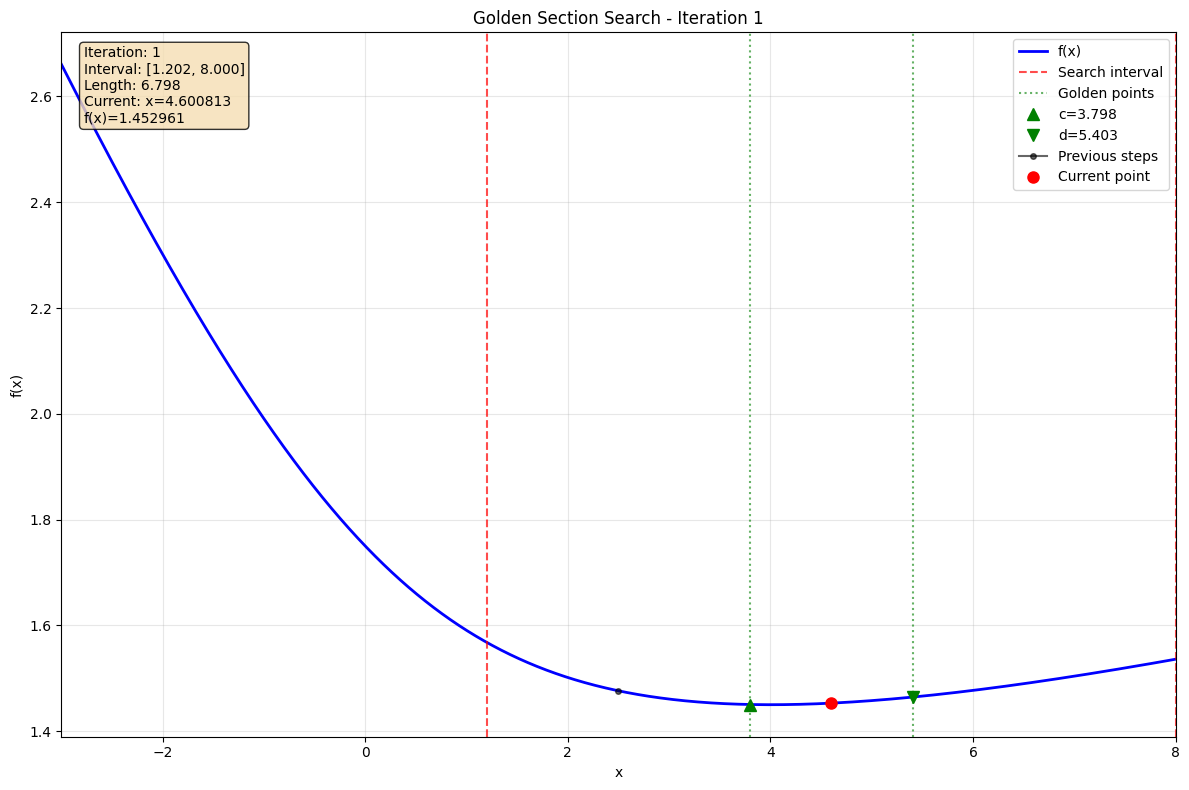

2: f(3.302439) = 1.454919 (+1.201626 - +5.403252)


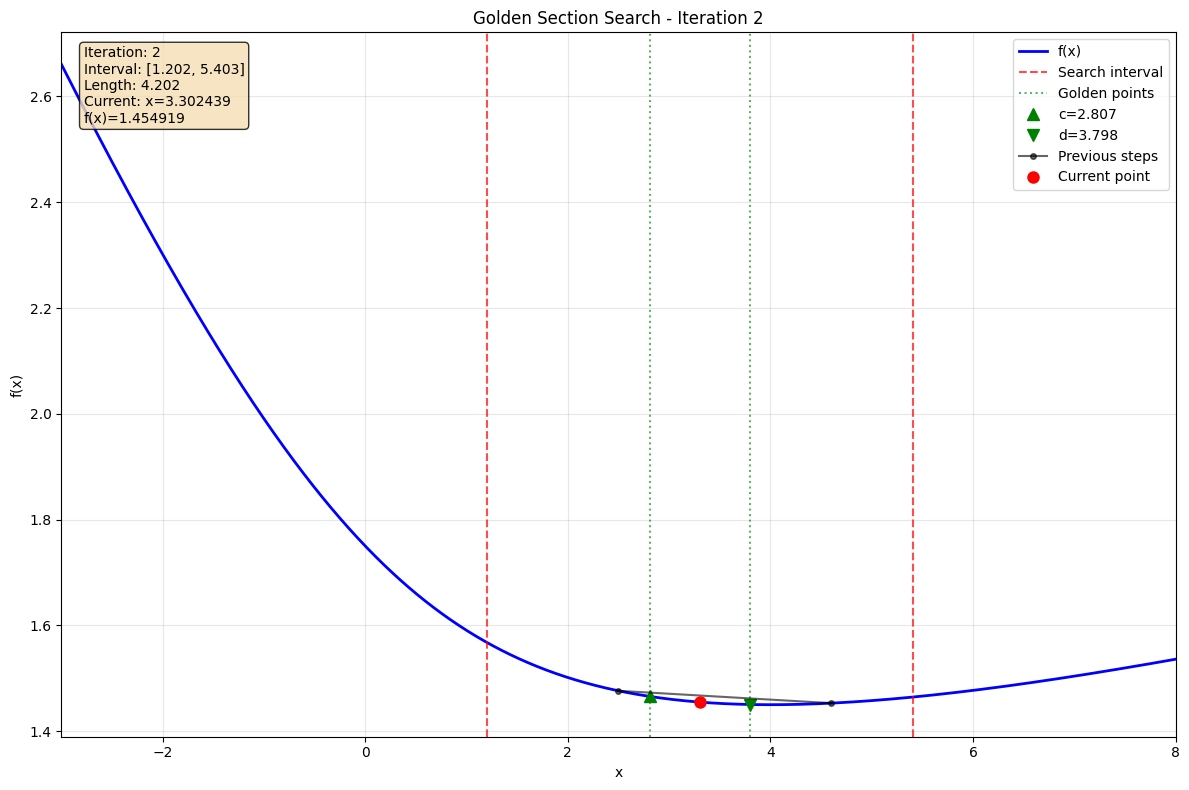

3: f(4.104878) = 1.450097 (+2.806504 - +5.403252)


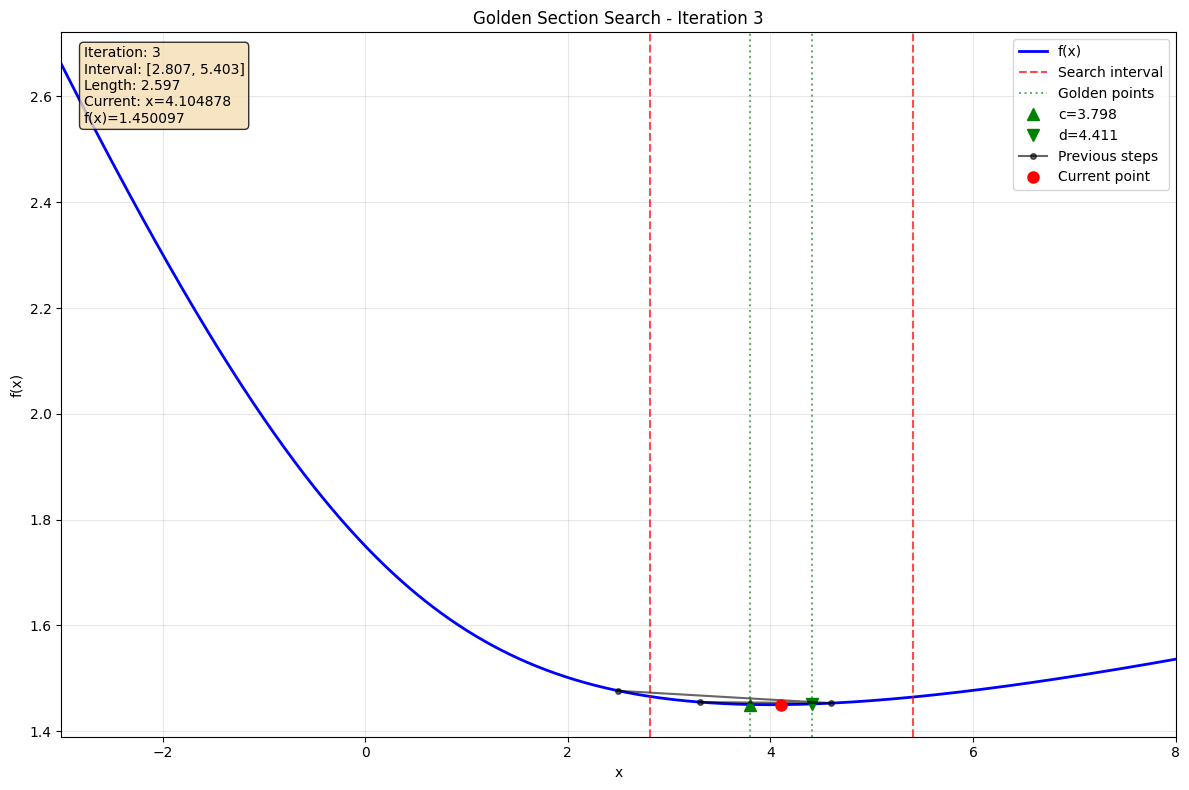

4: f(3.608944) = 1.451467 (+2.806504 - +4.411383)


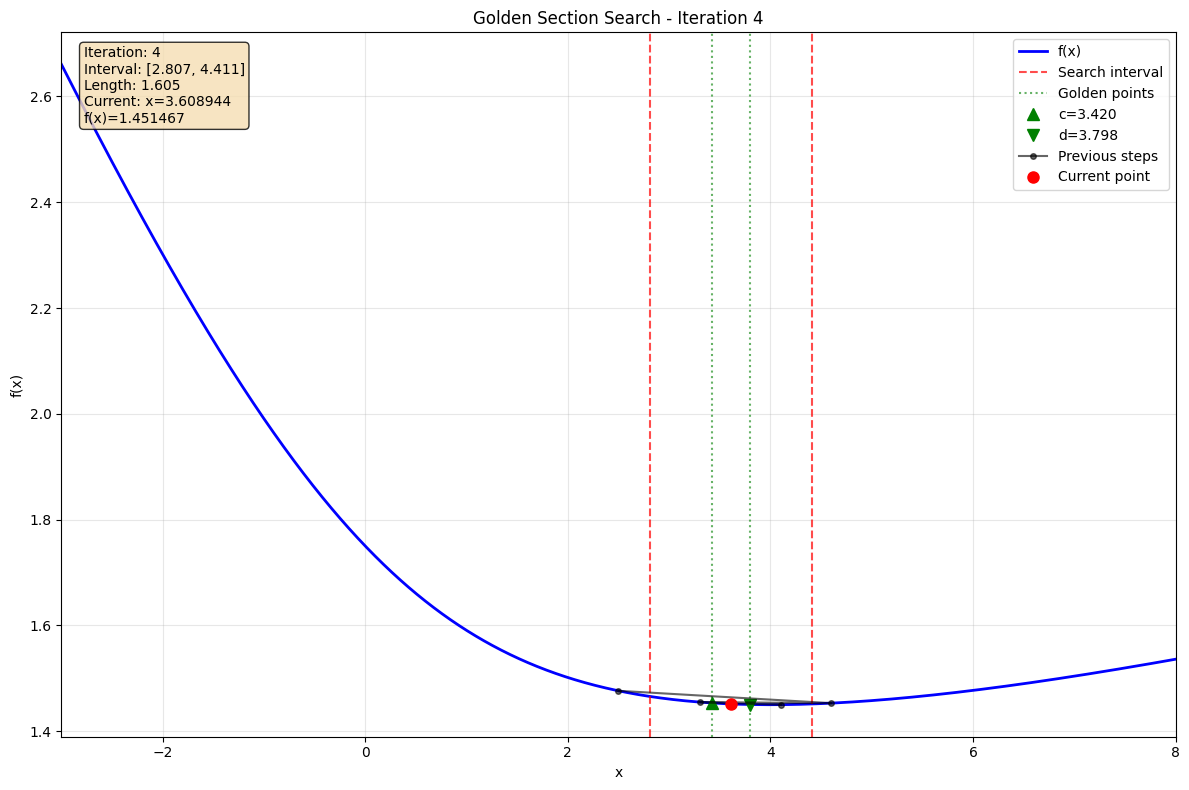

5: f(3.915448) = 1.450065 (+3.419513 - +4.411383)


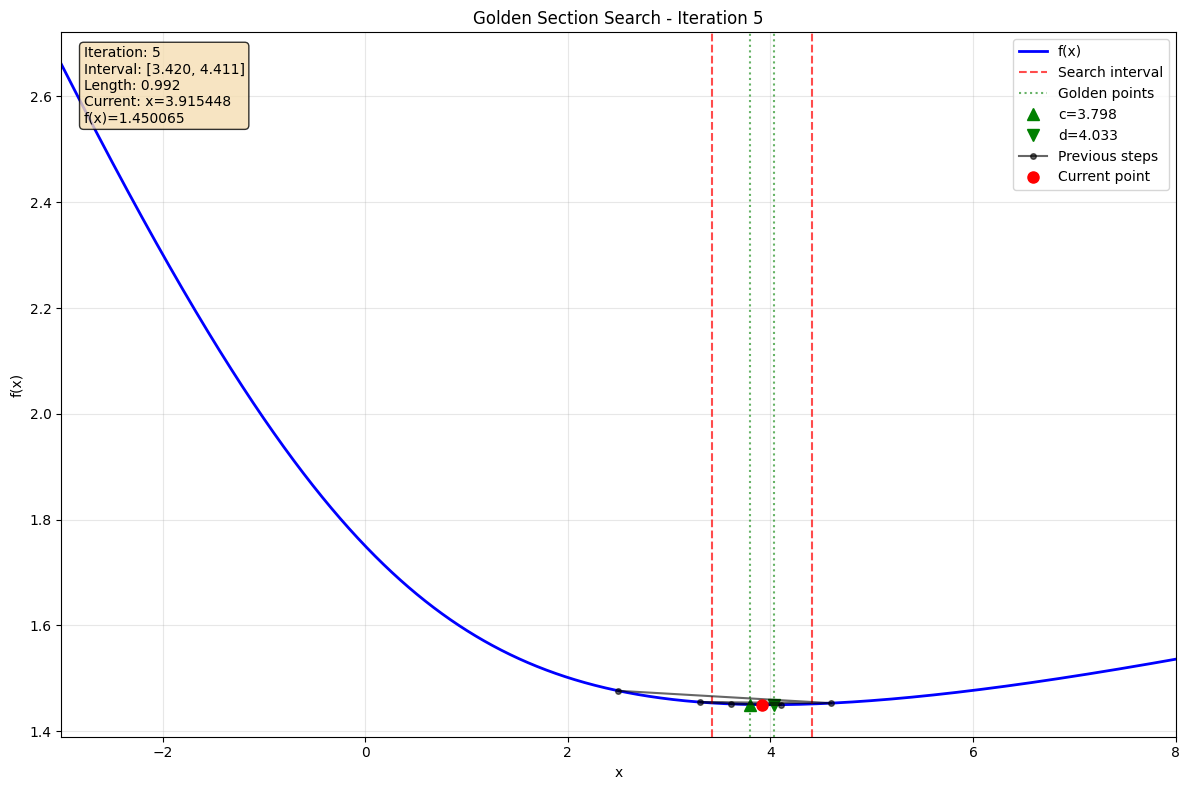


Golden-section result: x* = 4.10487837, f(x*) = 1.4500973577
time: 0.490532



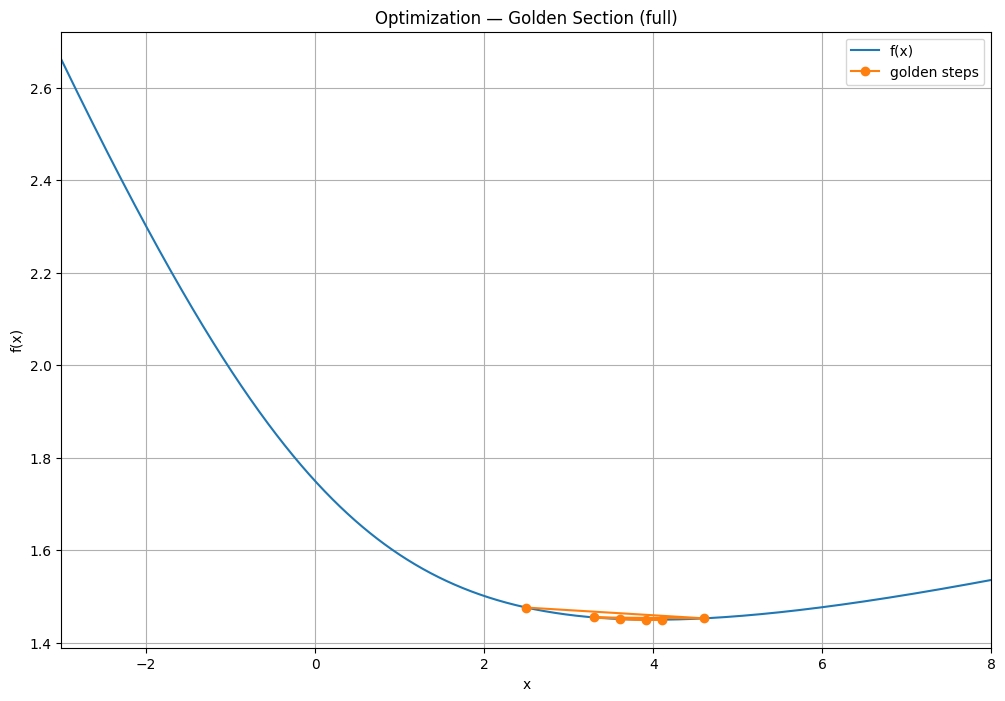

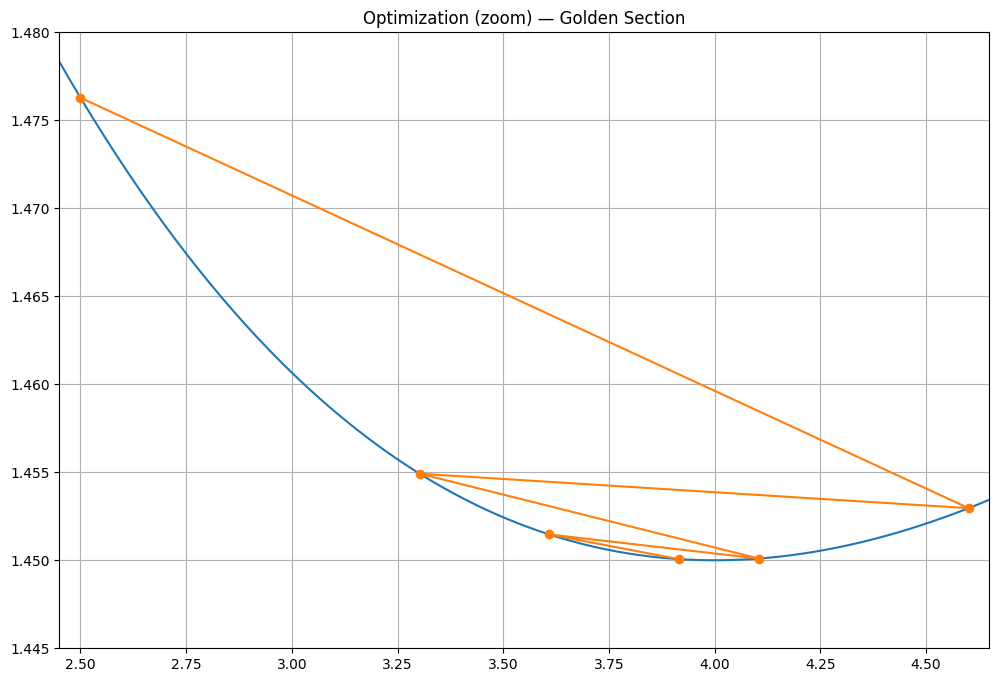

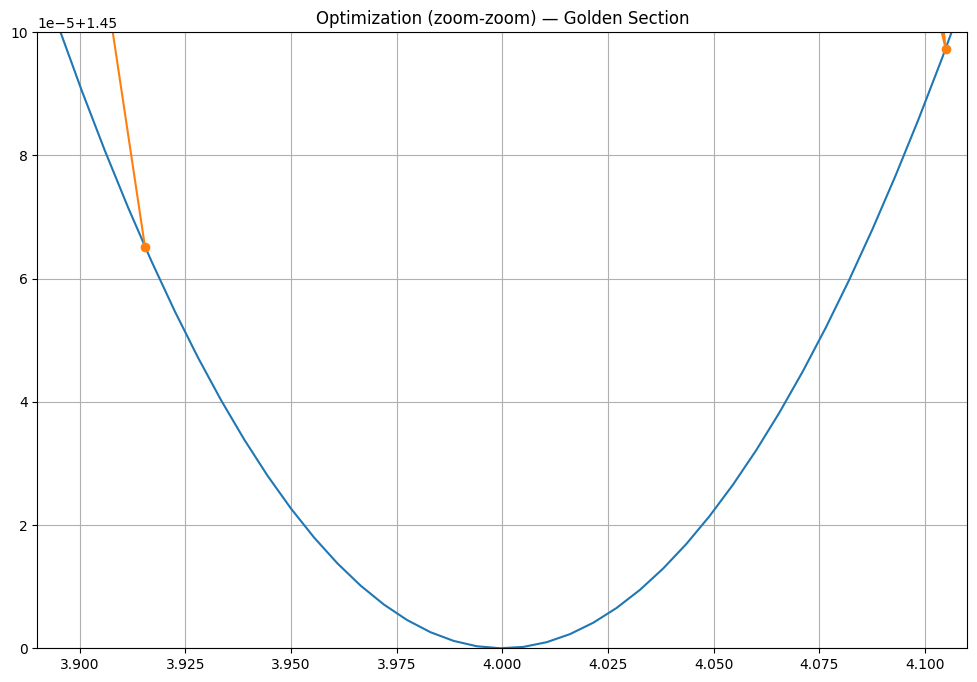

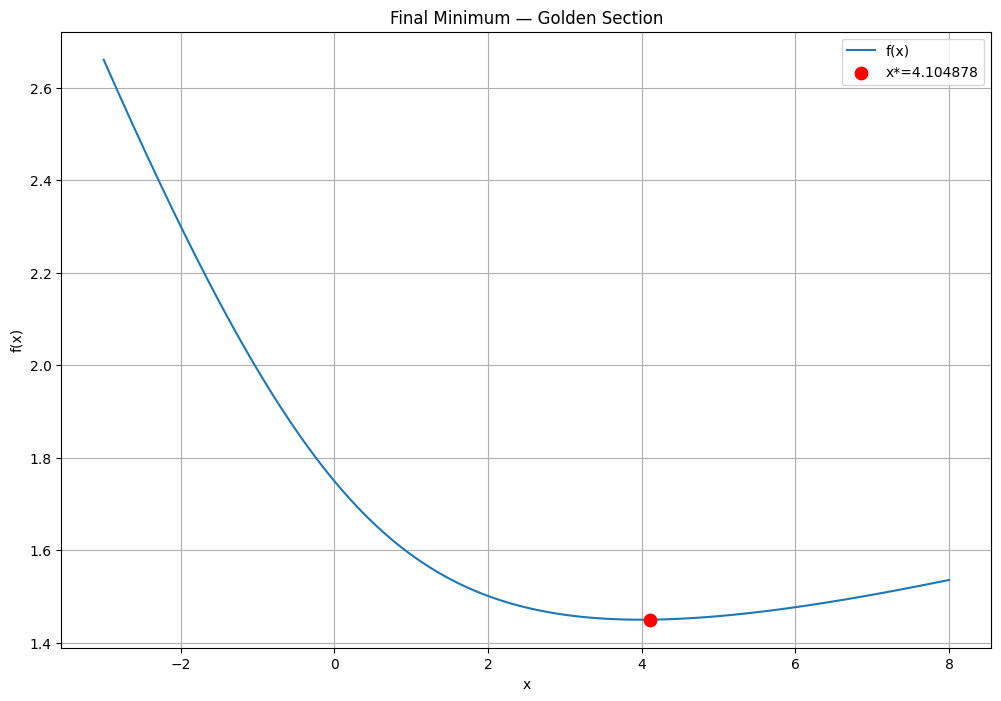

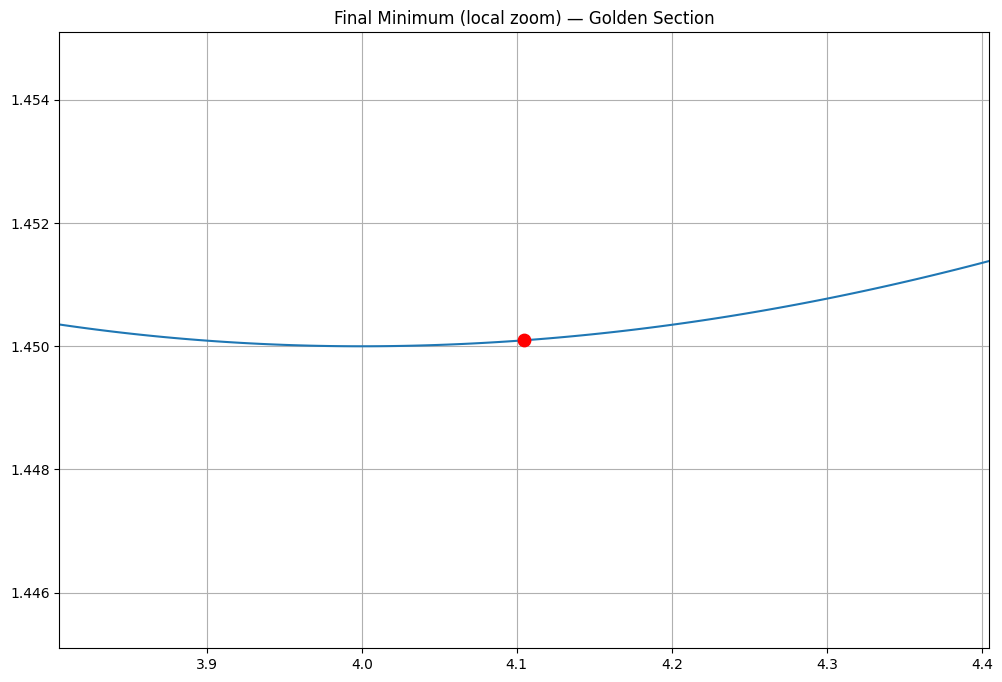

In [16]:
import math
import time
from typing import Callable, List, Tuple
import numpy as np
import matplotlib.pyplot as plt

A = -3.0
B = 8.0
EPS_X = 5e-2
EPS_F = 0.001
N = 14
SAMPLE_COUNT = 2000 

def f(x: float) -> float:
    return math.sqrt(x*x + 9.0)/4.0 + (5.0 - x)/5.0

def golden_section_search(func: Callable[[float], float],
                          a: float, b: float,
                          eps_x: float, eps_f: float,
                          max_iter: int) -> Tuple[float, float, List[float], List[float]]:
    phy = (1.0 + math.sqrt(5.0)) / 2.0
    rho = phy - 1.0
    n = max_iter

    trace_x, trace_f = [], []
    
    xs = np.linspace(A, B, SAMPLE_COUNT)
    ys = np.array([func(x) for x in xs])

    iteration_count = 0
    
    while True:
        mid = (a + b) / 2.0
        trace_x.append(mid)
        trace_f.append(func(mid))
        step_no = max_iter - n
        print(f"{step_no}: f({mid:.6f}) = {func(mid):.6f} ({a:+f} - {b:+f})")

        plt.figure(figsize=(12, 8))
        plt.plot(xs, ys, 'b-', label='f(x)', linewidth=2)
        plt.axvline(a, color='red', linestyle='--', alpha=0.7, label='Search interval')
        plt.axvline(b, color='red', linestyle='--', alpha=0.7)
        
        r = rho * (b - a)
        c = b - r
        d = a + r
        
        plt.axvline(c, color='green', linestyle=':', alpha=0.6, label='Golden points')
        plt.axvline(d, color='green', linestyle=':', alpha=0.6)
        plt.plot(c, func(c), 'g^', markersize=8, label=f'c={c:.3f}')
        plt.plot(d, func(d), 'gv', markersize=8, label=f'd={d:.3f}')
        
        if len(trace_x) > 1:
            plt.plot(trace_x[:-1], trace_f[:-1], 'ko-', markersize=4, alpha=0.6, label='Previous steps')
        plt.plot(trace_x[-1], trace_f[-1], 'ro', markersize=8, label='Current point')
        
        plt.xlim(A, B)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title(f'Golden Section Search - Iteration {step_no}')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        plt.text(0.02, 0.98, f'Iteration: {step_no}\nInterval: [{a:.3f}, {b:.3f}]\nLength: {b-a:.3f}\nCurrent: x={mid:.6f}\nf(x)={func(mid):.6f}', 
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.tight_layout()
        plt.show()

        if n <= 0 or (b - a) < eps_x:
            break

        fc, fd = func(c), func(d)
        if fc <= fd:
            b = d
        else:
            a = c
        n -= 1

        if abs(fc - fd) < eps_f:
            break

    x_star = (a + b) / 2.0
    return x_star, func(x_star), trace_x, trace_f

def show_all_plots(xs, ys, steps_x, steps_f, x_star, f_star, prefix="golden"):
    plt.figure(figsize=(12,8))
    plt.plot(xs, ys, label='f(x)')
    plt.plot(steps_x, steps_f, 'o-', label='golden steps')
    plt.title('Optimization — Golden Section (full)')
    plt.xlabel('x'); plt.ylabel('f(x)')
    plt.xlim(A, B); plt.grid(); plt.legend()
    plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys); plt.plot(steps_x, steps_f, 'o-')
    plt.xlim(2.45, 4.65); plt.ylim(1.445, 1.48)
    plt.title('Optimization (zoom) — Golden Section')
    plt.grid(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys); plt.plot(steps_x, steps_f, 'o-')
    plt.xlim(3.89, 4.11); plt.ylim(1.45, 1.4501)
    plt.title('Optimization (zoom-zoom) — Golden Section')
    plt.grid(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys, label='f(x)')
    plt.scatter([x_star], [f_star], c='red', s=80, zorder=10, label=f"x*={x_star:.6f}")
    plt.title('Final Minimum — Golden Section')
    plt.xlabel('x'); plt.ylabel('f(x)'); plt.grid(); plt.legend(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys)
    plt.scatter([x_star], [f_star], c='red', s=80, zorder=10)
    plt.xlim(x_star - 0.3, x_star + 0.3)
    plt.ylim(f_star - 0.005, f_star + 0.005)
    plt.title('Final Minimum (local zoom) — Golden Section')
    plt.grid(); plt.show()

xs = np.linspace(A, B, SAMPLE_COUNT)
ys = np.array([f(x) for x in xs])

print("\nGolden-section:")
start_time = time.perf_counter()
x_star, f_star, trace_x, trace_f = golden_section_search(f, A, B, EPS_X, EPS_F, N)
end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"\nGolden-section result: x* = {x_star:.8f}, f(x*) = {f_star:.10f}")
print(f"time: {elapsed_time:.6f}\n")

show_all_plots(xs, ys, trace_x, trace_f, x_star, f_star)

## Метод равномерного поиска

$$
\min_{x\in[a,b]} f(x),\qquad f:[a,b]\to\mathbb{R}
$$

$$
m\ge 2,\qquad h=\frac{b-a}{m-1},\qquad
x_i=a+i\,h,\quad i=0,1,\dots,m-1
$$

$$
f_i=f(x_i),\qquad
i^\star=\arg\min_{\,i\in\{0,\dots,m-1\}} f_i,\qquad
x^\star=x_{i^\star},\quad f(x^\star)=\min_i f_i
$$

$$
\text{(при унимодальной }f\text{):}\quad
x_{\min}\in\bigl[x_{i^\star-1},\,x_{i^\star+1}\bigr]\cap[a,b],\qquad
|x_{\min}-x^\star|\ \lesssim\ \frac{h}{2}
$$

$$
\text{обозн.: } m\ \text{— число узлов (напр., }m=N\text{);}\ 
h\ \text{— шаг сетки (напр., }h\le\varepsilon_x\text{);}\ 
x_i\ \text{— узлы},
$$

$$
\ f_i\ \text{— значения на узлах},
$$

$$
\
x^\star\ \text{— лучший узел},\ X=[a,b].
$$

$$
    M \geq \frac{b-a}{2\epsilon}
$$


Uniform:
0: f(2.500000) = 1.476281 (-3.000000 - +8.000000)


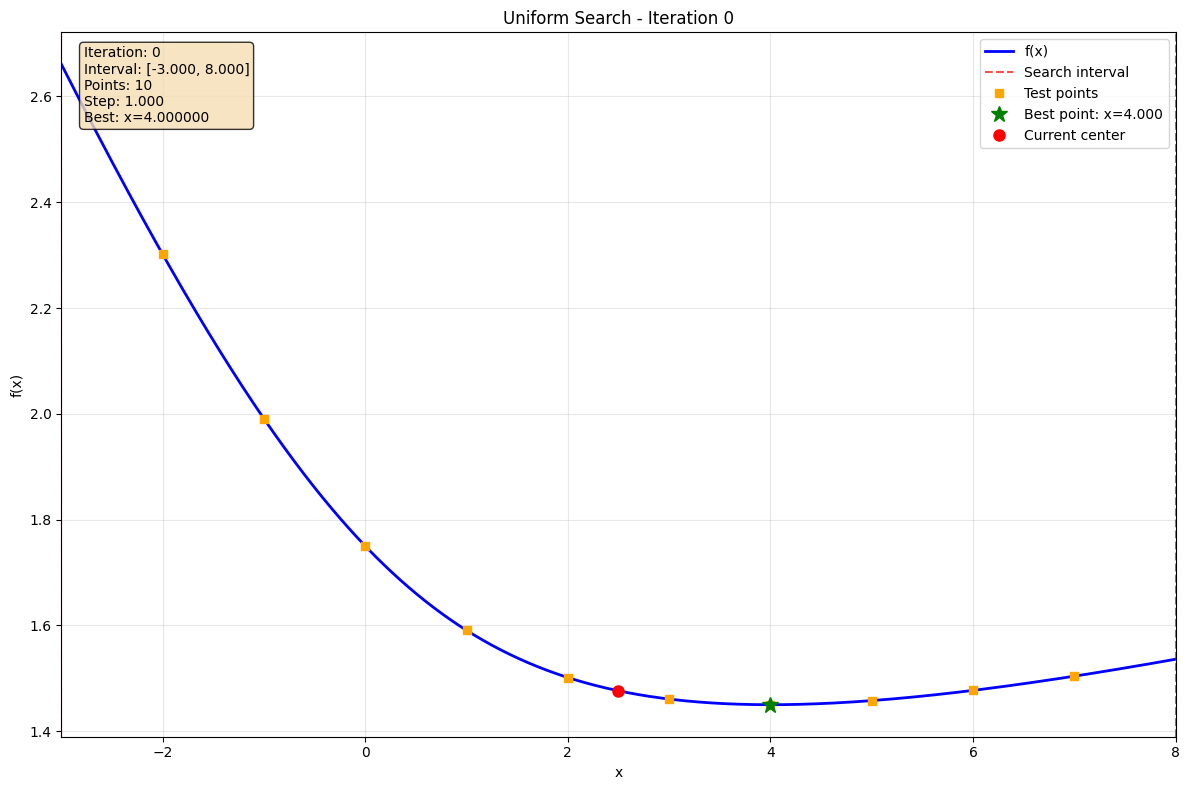

1: f(4.000000) = 1.450000 (+3.000000 - +5.000000)


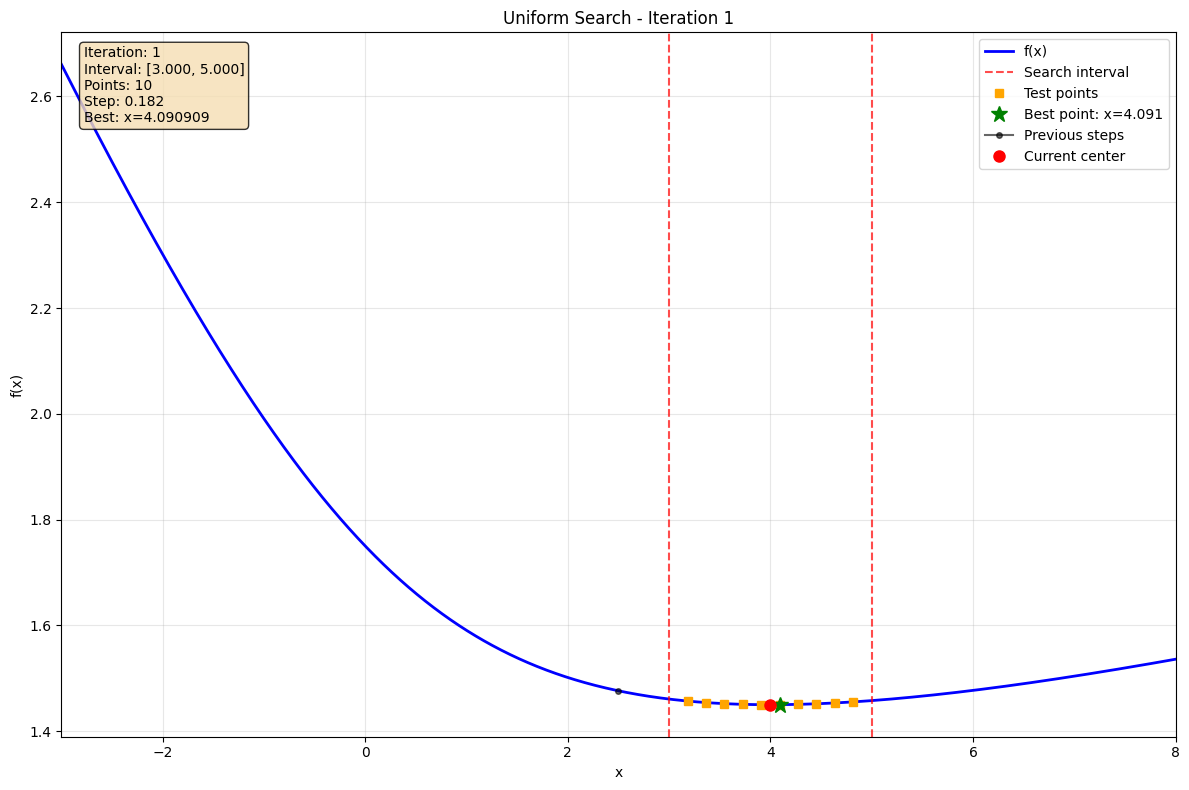

2: f(4.090909) = 1.450073 (+3.909091 - +4.272727)


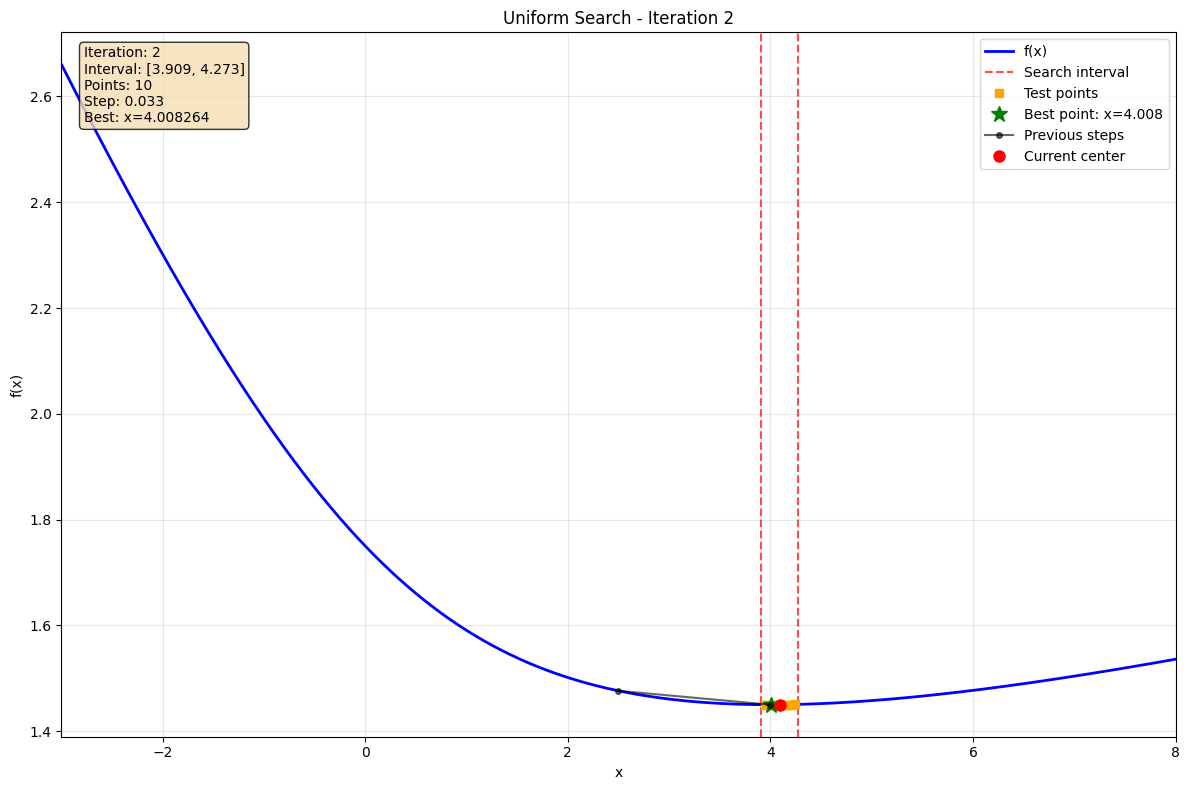


Uniform result: x* = 4.00826446, f(x*) = 1.4500006139
time: 0.234032



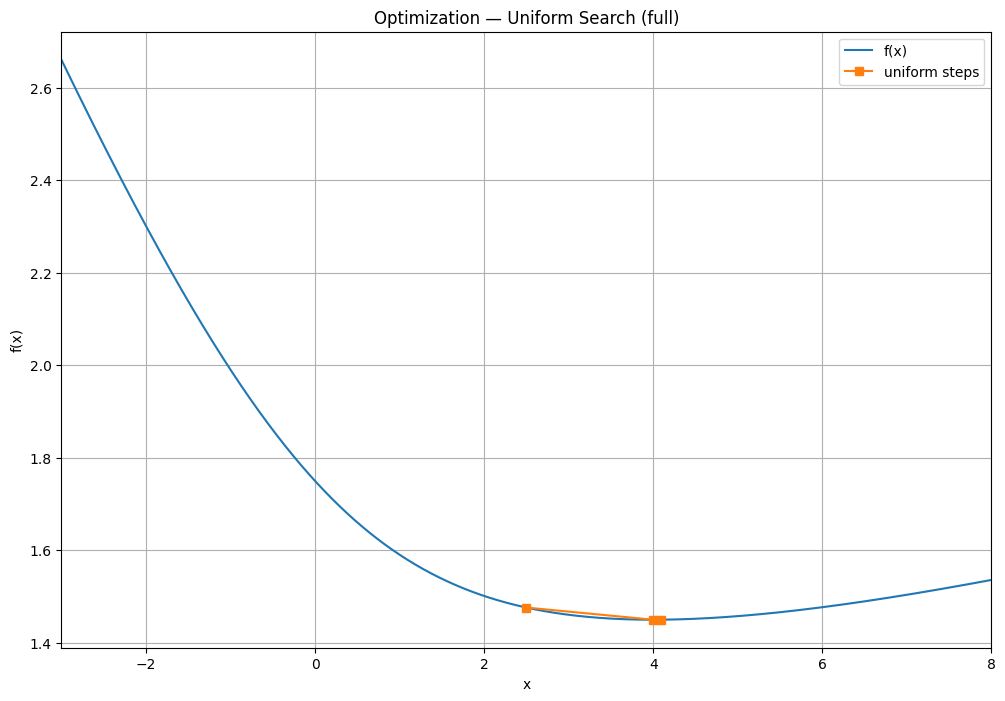

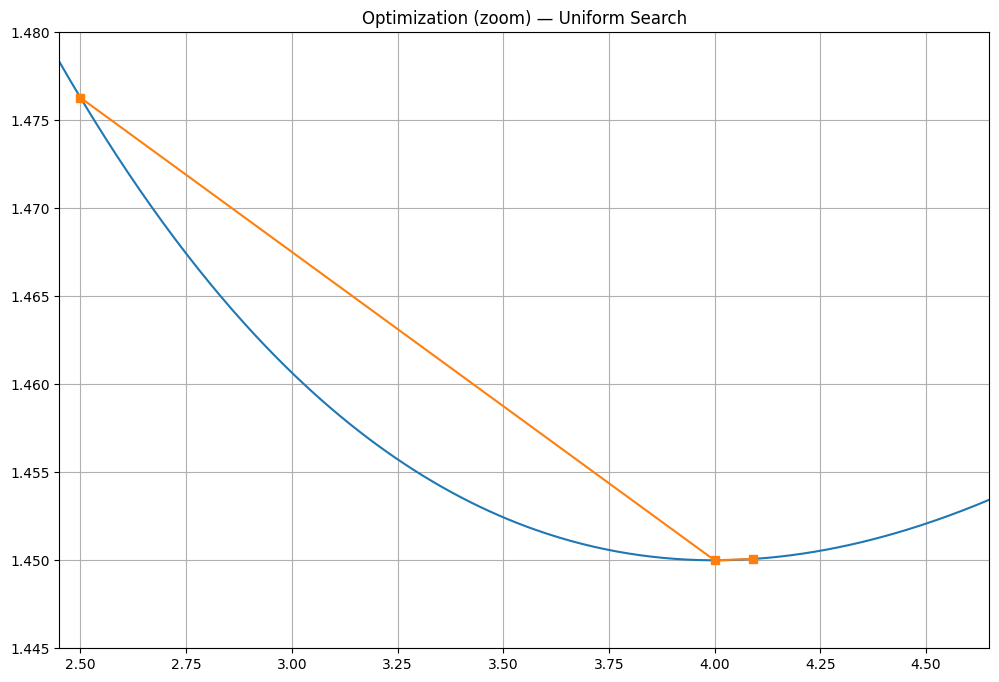

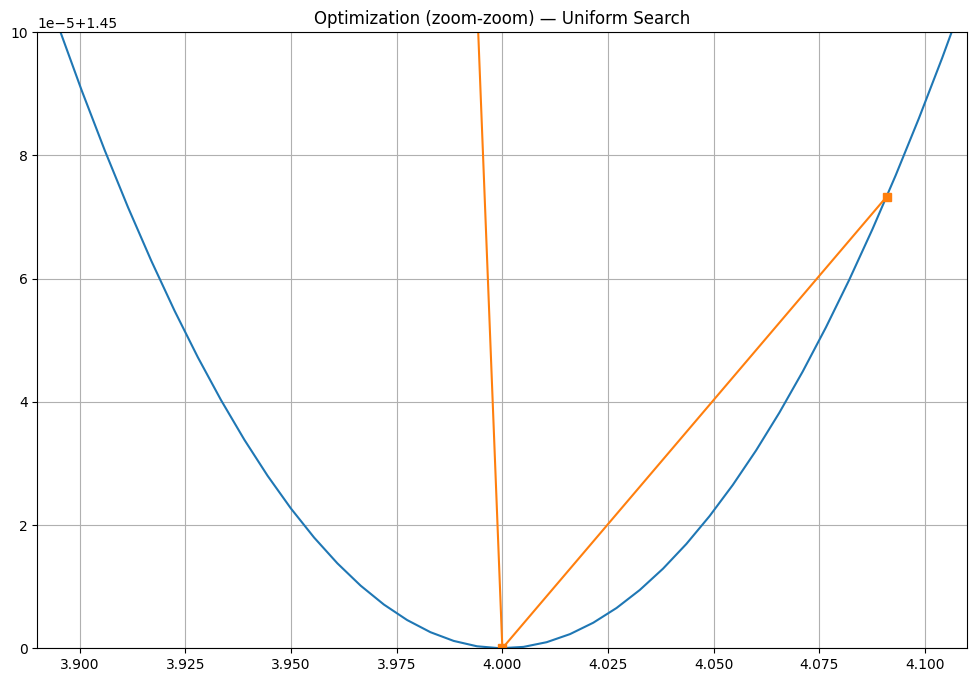

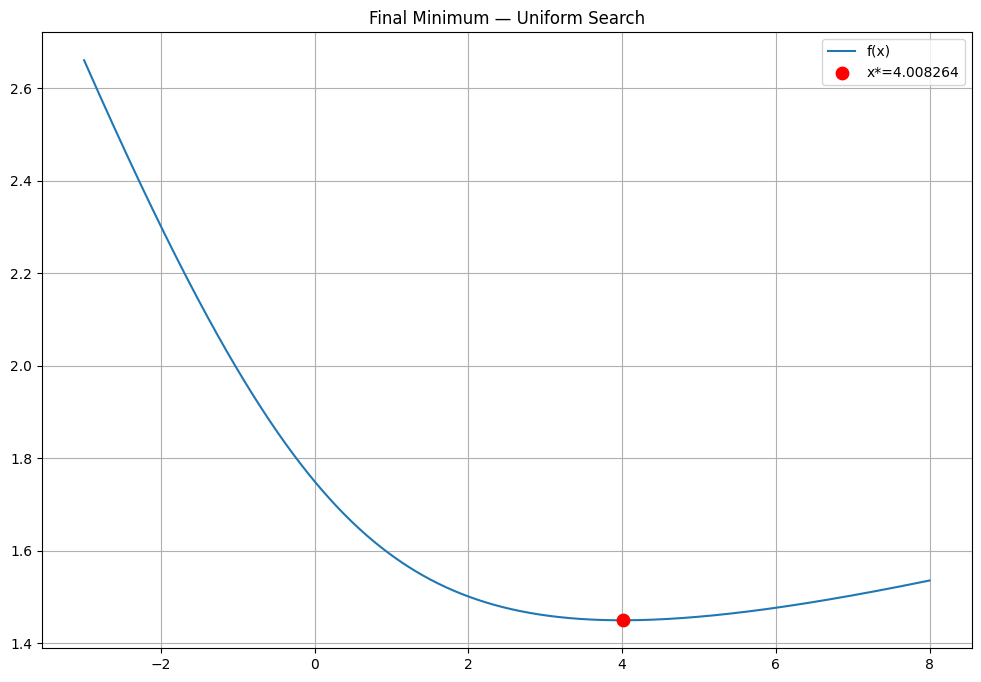

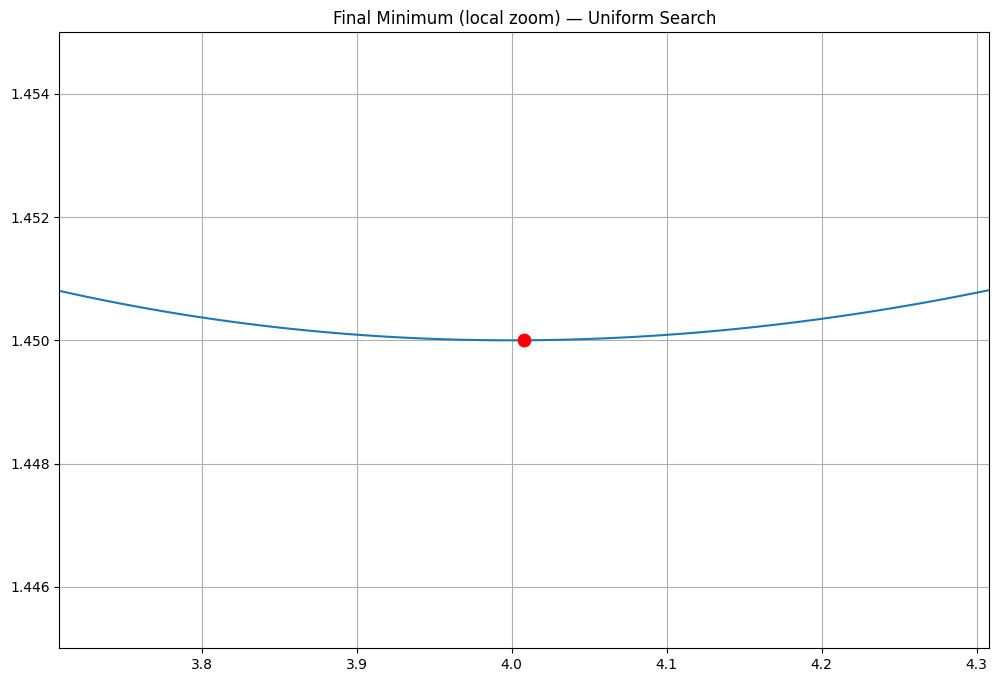

In [17]:
import math
import time
from typing import Callable, List, Tuple
import numpy as np
import matplotlib.pyplot as plt

A = -3.0
B = 8.0
EPS_X = 5e-2
EPS_F = 1e-5
N = 10
M = 10
SAMPLE_COUNT = 2000

def f(x: float) -> float:
    return math.sqrt(x*x + 9.0)/4.0 + (5.0 - x)/5.0

def uniform_search(func: Callable[[float], float],
                   a: float, b: float,
                   eps_x: float, eps_f: float,
                   max_iter: int, m: int) -> Tuple[float, float, List[float], List[float]]:
    assert m > 2
    n = max_iter
    trace_x, trace_f = [], []
    
    xs = np.linspace(A, B, SAMPLE_COUNT)
    ys = np.array([func(x) for x in xs])

    while True:
        mid = (a + b) / 2.0
        trace_x.append(mid)
        trace_f.append(func(mid))
        step_no = max_iter - n
        print(f"{step_no}: f({mid:.6f}) = {func(mid):.6f} ({a:+f} - {b:+f})")

        plt.figure(figsize=(12, 8))
        plt.plot(xs, ys, 'b-', label='f(x)', linewidth=2)
        plt.axvline(a, color='red', linestyle='--', alpha=0.7, label='Search interval')
        plt.axvline(b, color='red', linestyle='--', alpha=0.7)
        
        dx = (b - a) / (m + 1)
        test_points = [a + i*dx for i in range(1, m+1)]
        test_values = [func(x) for x in test_points]
        
        plt.plot(test_points, test_values, 's', color='orange', markersize=6, label='Test points')
        
        min_i, min_fx = 1, func(a + dx)
        for i in range(2, m+1):
            x = a + i*dx
            fx = func(x)
            if fx < min_fx:
                min_i, min_fx = i, fx
                
        best_point = a + min_i*dx
        plt.plot(best_point, min_fx, 'g*', markersize=12, label=f'Best point: x={best_point:.3f}')
        
        if len(trace_x) > 1:
            plt.plot(trace_x[:-1], trace_f[:-1], 'ko-', markersize=4, alpha=0.6, label='Previous steps')
        plt.plot(trace_x[-1], trace_f[-1], 'ro', markersize=8, label='Current center')
        
        plt.xlim(A, B)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title(f'Uniform Search - Iteration {step_no}')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        plt.text(0.02, 0.98, f'Iteration: {step_no}\nInterval: [{a:.3f}, {b:.3f}]\nPoints: {m}\nStep: {dx:.3f}\nBest: x={best_point:.6f}', 
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.tight_layout()
        plt.show()

        if n <= 0 or (b - a) < eps_x:
            break

        old_a, old_b = a, b
        a = a + (min_i - 1)*dx
        b = a + 2*dx
        n -= 1

        if (b - a)/2 < eps_x:
            break
        if abs(func((old_a + old_b)/2) - min_fx) < eps_f:
            break

    x_star = (a + b)/2
    return x_star, func(x_star), trace_x, trace_f

def show_all_plots(xs, ys, steps_x, steps_f, x_star, f_star, prefix="uniform"):
    plt.figure(figsize=(12,8))
    plt.plot(xs, ys, label='f(x)')
    plt.plot(steps_x, steps_f, 's-', label='uniform steps')
    plt.title('Optimization — Uniform Search (full)')
    plt.xlabel('x'); plt.ylabel('f(x)')
    plt.xlim(A, B); plt.grid(); plt.legend(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys); plt.plot(steps_x, steps_f, 's-')
    plt.xlim(2.45, 4.65); plt.ylim(1.445, 1.48)
    plt.title('Optimization (zoom) — Uniform Search'); plt.grid(); plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(xs, ys); plt.plot(steps_x, steps_f, 's-')
    plt.xlim(3.89, 4.11); plt.ylim(1.45, 1.4501)
    plt.title('Optimization (zoom-zoom) — Uniform Search'); plt.grid(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys, label='f(x)')
    plt.scatter([x_star], [f_star], c='red', s=80, zorder=10, label=f"x*={x_star:.6f}")
    plt.title('Final Minimum — Uniform Search'); plt.grid(); plt.legend(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys)
    plt.scatter([x_star], [f_star], c='red', s=80, zorder=10)
    plt.xlim(x_star - 0.3, x_star + 0.3)
    plt.ylim(f_star - 0.005, f_star + 0.005)
    plt.title('Final Minimum (local zoom) — Uniform Search'); plt.grid(); plt.show()

xs = np.linspace(A, B, SAMPLE_COUNT)
ys = np.array([f(x) for x in xs])

print("\nUniform:")
start_time = time.perf_counter()
x_star, f_star, trace_x, trace_f = uniform_search(f, A, B, EPS_X, EPS_F, N, M)
end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"\nUniform result: x* = {x_star:.8f}, f(x*) = {f_star:.10f}")
print(f"time: {elapsed_time:.6f}\n")

show_all_plots(xs, ys, trace_x, trace_f, x_star, f_star)

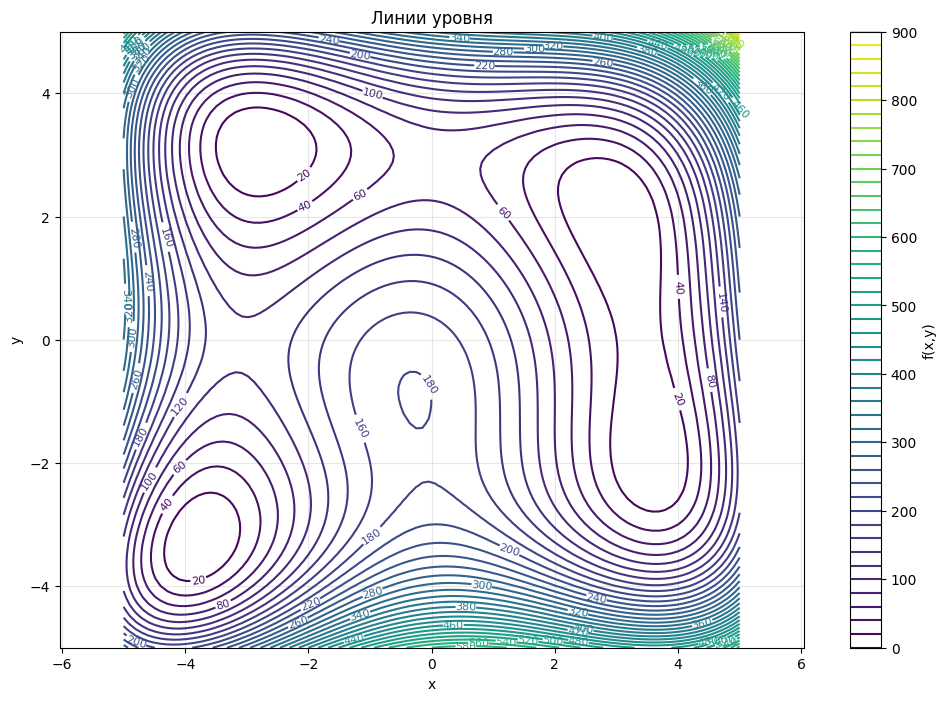

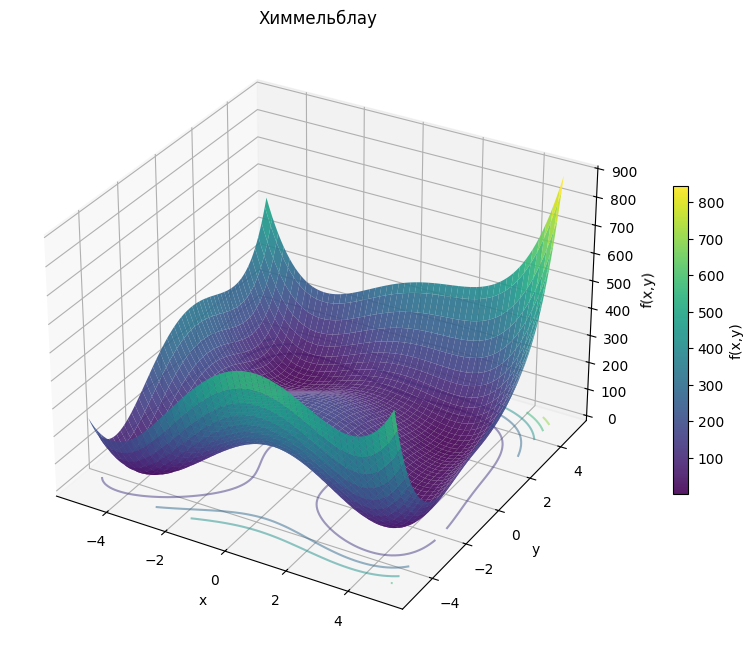

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.colorbar(contour, label='f(x,y)')
plt.title('Линии уровня')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, 
                      linewidth=0, antialiased=True)

ax.contour(X, Y, Z, zdir='z', offset=Z.min(), cmap='viridis', alpha=0.5)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20, label='f(x,y)')
ax.set_title('Химмельблау')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

plt.show()

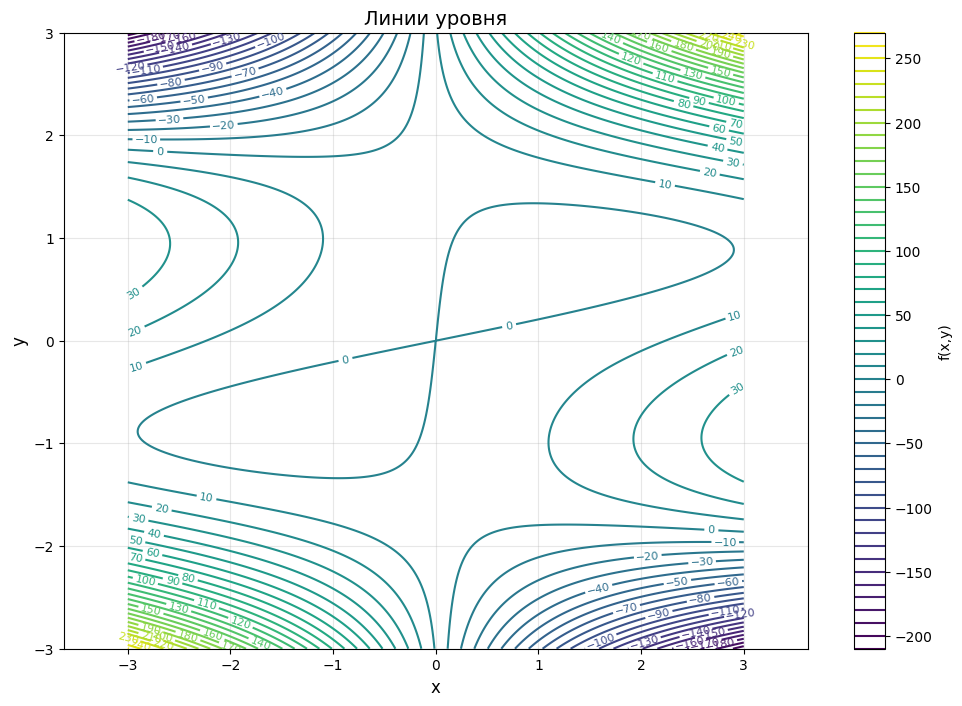

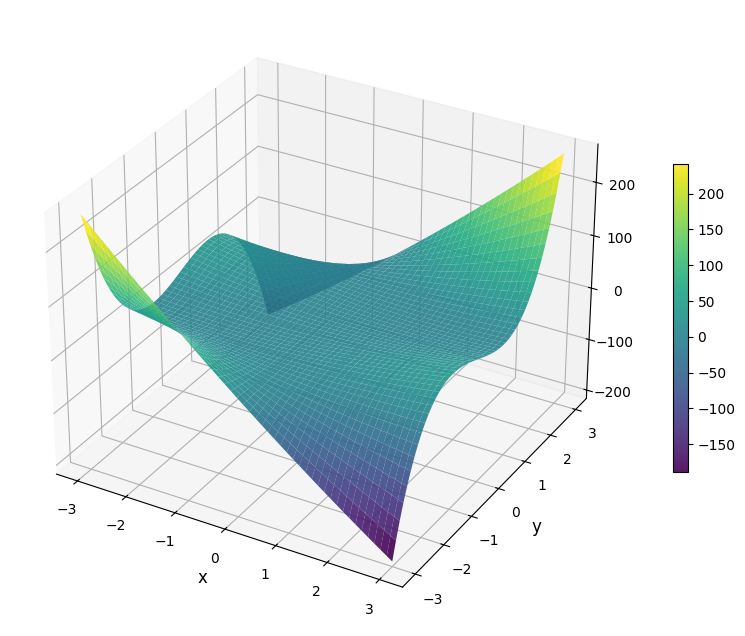

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 2*x**2 + 4*x*y**3 - 10*x*y + y**2

x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='f(x,y)')
plt.clabel(contour, inline=True, fontsize=8)

plt.title('Линии уровня', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)

plt.show()

# Лабораторная работа №2: Градиентный спуск